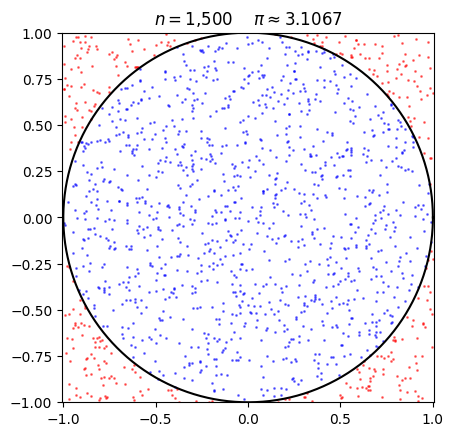

In [20]:
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

num_of_frames = 100
num_of_samples = 150_000

x = uniform(low=-1.0, high=1.0, size=num_of_samples)
y = uniform(low=-1.0, high=1.0, size=num_of_samples)

radius = 1.0
theta = np.linspace(0, 2 * np.pi, 1000)
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

pi_estimates_2d = []  # Array to store pi estimates

fig, ax = plt.subplots(figsize=(4.8, 4.8))

def animate(i):
    # print(i)
    ax.clear()
    x_samples = x[:int(num_of_samples*(i+1)/num_of_frames)]
    y_samples = y[:int(num_of_samples * (i+1) / num_of_frames)]
    inside_circle = np.sqrt(x_samples ** 2 + y_samples ** 2) <= 1
    x_inside = x_samples[inside_circle]
    x_outside = x_samples[~inside_circle]
    y_inside = y_samples[inside_circle]
    y_outside = y_samples[~inside_circle]

    pi_estimate = 4 * len(x_inside) / len(x_samples)
    pi_estimates_2d.append(pi_estimate)

    ax.scatter(x_inside, y_inside, 1, c='b', alpha=0.5)
    ax.scatter(x_outside, y_outside, 1, c='r', alpha=0.5)
    ax.plot(x_circle, y_circle, 'k')
    ax.axis('equal')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_title(fr'$n = ${len(x_samples):,}    $\pi \approx {4*len(x_inside)/len(x_samples):.4f}$')
    return


ani = FuncAnimation(fig, animate, interval=200, repeat=True, frames=num_of_frames)
ani.save("TLI.gif", dpi=300, writer=PillowWriter(fps=10))

[3.124, 3.124, 3.152, 3.164, 3.145, 3.1344, 3.1246666666666667, 3.138857142857143, 3.1395, 3.14, 3.1412, 3.1323636363636362, 3.135666666666667, 3.138153846153846, 3.138, 3.1368, 3.133, 3.132, 3.1386666666666665, 3.1277894736842105, 3.1248, 3.1281904761904764, 3.132, 3.1328695652173915, 3.1271666666666667, 3.12816, 3.1306153846153846, 3.136296296296296, 3.1414285714285715, 3.144, 3.1486666666666667, 3.1505806451612903, 3.15125, 3.151030303030303, 3.1508235294117646, 3.1512, 3.1518888888888887, 3.1534054054054055, 3.154526315789474, 3.1524102564102563, 3.1561, 3.1575609756097562, 3.1576190476190478, 3.1553488372093024, 3.1568181818181817, 3.155822222222222, 3.155826086956522, 3.158723404255319, 3.1595833333333334, 3.1612244897959183, 3.16384, 3.165098039215686, 3.1653846153846152, 3.1650566037735848, 3.165925925925926, 3.1671272727272726, 3.1674285714285713, 3.167157894736842, 3.167103448275862, 3.165694915254237, 3.1648666666666667, 3.1644590163934425, 3.1648387096774195, 3.167936507936

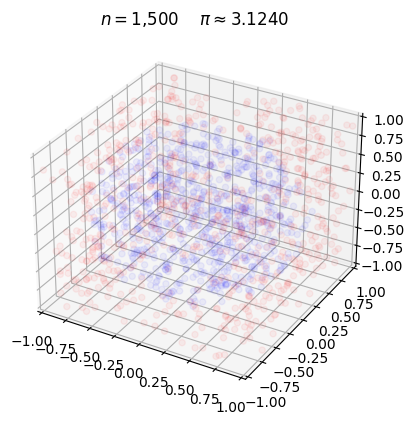

In [22]:
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D

num_of_frames = 100
num_of_samples = 150_000

# 3D Sampling
x = uniform(low=-1.0, high=1.0, size=num_of_samples)
y = uniform(low=-1.0, high=1.0, size=num_of_samples)
z = uniform(low=-1.0, high=1.0, size=num_of_samples)

radius = 1.0
pi_estimates_3d = []  # Array to store pi estimates

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def animate(i):
    # print(i)
    ax.clear()
    samples_count = int(num_of_samples * (i + 1) / num_of_frames)
    x_samples = x[:samples_count]
    y_samples = y[:samples_count]
    z_samples = z[:samples_count]
    
    inside_sphere = np.sqrt(x_samples**2 + y_samples**2 + z_samples**2) <= 1
    x_inside = x_samples[inside_sphere]
    y_inside = y_samples[inside_sphere]
    z_inside = z_samples[inside_sphere]
    
    x_outside = x_samples[~inside_sphere]
    y_outside = y_samples[~inside_sphere]
    z_outside = z_samples[~inside_sphere]
    
    pi_estimate = 6 * len(x_inside) / samples_count
    pi_estimates_3d.append(pi_estimate)  # Save the current estimate of pi

    ax.scatter(x_inside, y_inside, z_inside, c='b', alpha=0.05)
    ax.scatter(x_outside, y_outside, z_outside, c='r', alpha=0.05)
    
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_title(fr'$n = ${samples_count:,}    $\pi \approx {pi_estimate:.4f}$')
    return

ani = FuncAnimation(fig, animate, interval=200, repeat=True, frames=num_of_frames)
ani.save("3D_MonteCarlo.gif", dpi=300, writer=PillowWriter(fps=10))

# After the animation, pi_estimates will contain all the estimates of pi
print(pi_estimates_3d)  # You can inspect or process this list further as needed

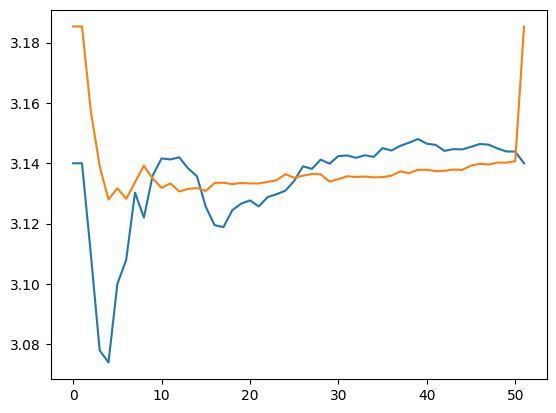

In [15]:
plt.plot(pi_estimates_3d)
plt.plot(pi_estimates_2d)
plt.show()

In [18]:
# find min and max over joint pi_estimates_2d and pi_estimates_3d
min_val = min(min(pi_estimates_2d), min(pi_estimates_3d))
max_val = max(max(pi_estimates_2d), max(pi_estimates_3d))

(3.128, 3.1853333333333333, 3.074, 3.148051282051282)

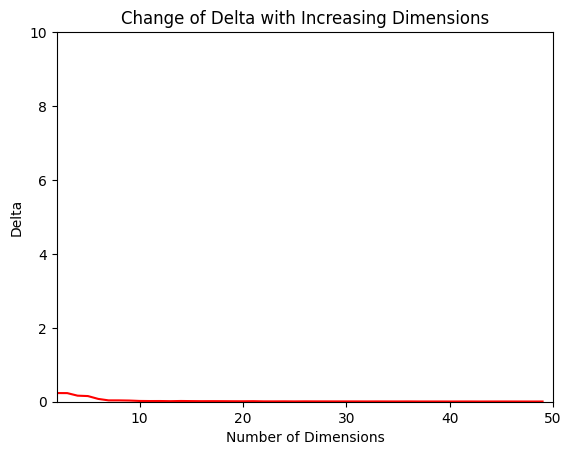

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import math

# Number of dimensions to animate
dimensions = range(2, 50)

def compute_delta(N):
    # Generate 1000 random points and a reference point in N dimensions
    P = [np.random.randint(-100, 100, N) for _ in range(1000)]
    Q = np.random.randint(-100, 100, N)
    # Calculate distances from Q to each point in P
    diffs = [np.linalg.norm(p - Q) for p in P]
    # Get maximum and minimum distance
    mxd = max(diffs)
    mnd = min(diffs)
    # Calculate delta
    return math.log10(mxd - mnd) / mnd if mnd != 0 else 0  # guard against division by zero

# Create figure and axis objects
fig, ax = plt.subplots()

# Set labels and title
ax.set_xlabel('Number of Dimensions')
ax.set_ylabel('Delta')
ax.set_title('Change of Delta with Increasing Dimensions')

# Initialize a line object on the plot
line, = ax.plot([], [], 'r-')

# Limit the x-axis and y-axis for clarity
ax.set_xlim(2, 50)
ax.set_ylim(0, 10)  # You may need to adjust this depending on the output

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function: this is called sequentially
def animate(i):
    y_data = compute_delta(i)
    x_data = i
    x, y = line.get_data()
    x = np.append(x, x_data)
    y = np.append(y, y_data)
    line.set_data(x, y)
    return line,

# Create animation
ani = FuncAnimation(fig, animate, frames=dimensions, init_func=init, blit=True)

# To save the animation as a GIF using PillowWriter
writer = PillowWriter(fps=10)  # fps controls the frame rate
ani.save('delta_change.gif', writer=writer)

plt.show()


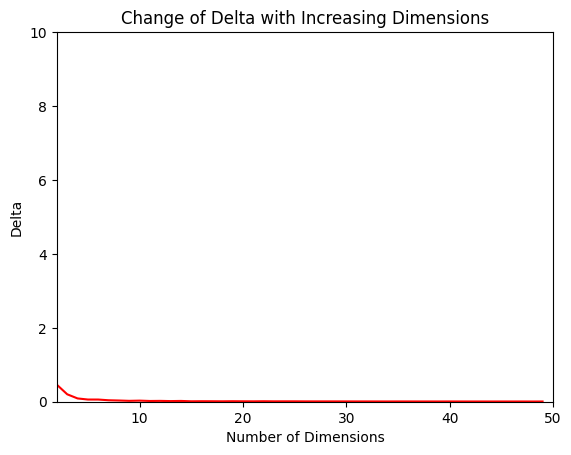

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import math

# Number of dimensions to animate
dimensions = range(2, 50)

def compute_delta(N):
    # Generate 1000 random points and a reference point in N dimensions
    P = [np.random.randint(-100, 100, N) for _ in range(1000)]
    Q = np.random.randint(-100, 100, N)
    # Calculate distances from Q to each point in P
    diffs = [np.linalg.norm(p - Q) for p in P]
    # Get maximum and minimum distance
    mxd = max(diffs)
    mnd = min(diffs)
    # Calculate delta
    return math.log10(mxd - mnd) / mnd if mnd != 0 else 0  # guard against division by zero

# Create figure and axis objects
fig, ax = plt.subplots()

# Set labels and title
ax.set_xlabel('Number of Dimensions')
ax.set_ylabel('Delta')
ax.set_title('Change of Delta with Increasing Dimensions')

# Initialize a line object on the plot
line, = ax.plot([], [], 'r-')

# Limit the x-axis and y-axis for clarity
ax.set_xlim(2, 50)
ax.set_ylim(0, 10)  # You may need to adjust this depending on the output

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function: this is called sequentially
def animate(i):
    y_data = compute_delta(i)
    x_data = i
    x, y = line.get_data()
    x = np.append(x, x_data)
    y = np.append(y, y_data)
    line.set_data(x, y)
    return line,

# Create animation
ani = FuncAnimation(fig, animate, frames=dimensions, init_func=init, blit=True)

# Save the animation as a GIF
ani.save('dimension_delta.gif', writer='pillow', fps=2)

plt.show()

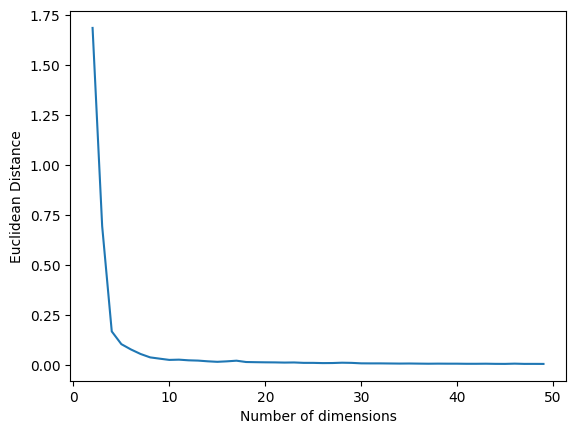

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math

deltas = []
for N in range(2,50):
    # Generate 1000 random points in N dimensions.
    P = [np.random.randint(-100, 100, N) for _ in range(10000)]
    Q = np.random.randint(-100,100,N)
    diffs = [np.linalg.norm(p-Q) for p in P]
    mxd = max(diffs)
    mnd = min(diffs)
    delta = math.log10(mxd-mnd)/mnd
    deltas.append( delta )

plt.plot(range(2,50),deltas)
plt.xlabel('Number of dimensions')
plt.ylabel('Euclidean Distance')
plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

def plot_graph(data):
    """ Generate frames for each step in the data plotting. """
    frames = []
    for i in range(1, len(data) + 1):
        plt.figure(figsize=(8, 5))  # Create a new figure
        plt.plot(data[:i], marker='o', color='b')  # Plot the partial data
        plt.xlim(0, len(data) - 1)  # Set x-axis limits
        plt.ylim(min(data), max(data))  # Set y-axis limits
        plt.xlabel('Dimensions')
        plt.ylabel('Euclidean Distance')
        # Save the plot to a BytesIO object and then to a PIL image
        buf = BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        frame = Image.open(buf)
        frames.append(frame)
        plt.close()  # Close the plt figure to free memory

    return frames

def save_gif(frames, path, duration=500):
    """ Save the frames as an animated GIF. """
    frames[0].save(path, format='GIF', append_images=frames[1:], save_all=True, duration=duration, loop=0)

# Generate frames
frames = plot_graph(deltas)

# Save to GIF
save_gif(frames, 'animated_graph.gif')